# Homework 1

## Part A 
- In this homework, I investigated three different time series data that might be correlated when we look over the years. The Data I used is provided by www.https://evds2.tcmb.gov.tr/ 
- I downloaded three data series which are USD(buying) prices, Gold Prices and lastly Consumer Price Index for more than a three year on the monthly basis
- I chose these three because gold prices and overall price of the products are higly related with USD since some of the products are imported and also gold prices are generally followed by the changes in USD 
- For each data, I used Pandas dataframe for manipulation and matplotlib and seaborn for visualization. 
- Basic manupulations I did were importing data, converting excel data into data frame, changing column name, changing index to time series and  dropping irrelevant information that data set has given. 

In [7]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [8]:
df = pd.read_excel("USD.xlsx")
usd = df.copy()
usd.drop("Unnamed: 2" , axis = 'columns' , inplace = True)
usd.set_index("Tarih", inplace = True)
usd.columns = ['USD(buying)']
usd.drop(usd.tail(6).index,
        inplace = True)
usd.head()

,USD(buying)
Tarih,
2018-01,3.772327
2018-02,3.77802
2018-03,3.880877
2018-04,4.05403
2018-05,4.414145


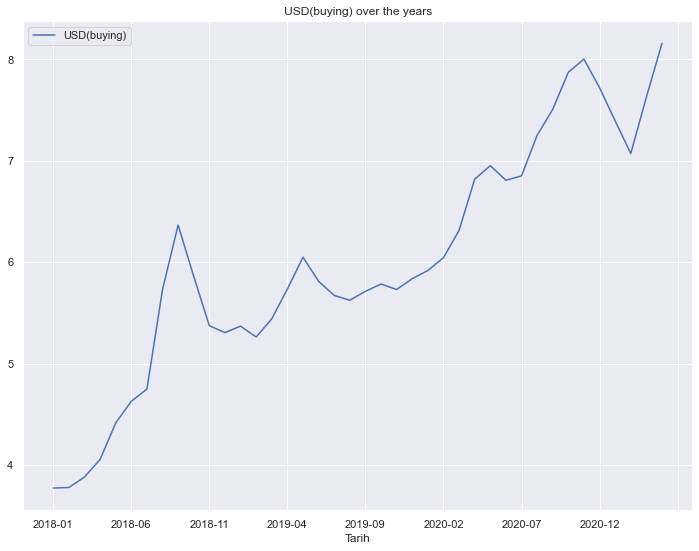

In [9]:
sns.set(rc={'figure.figsize':(12,9)}) #I used an extra command here to make plots bigger
usd.plot()
plt.title("USD(buying) over the years")
plt.show()

- Looking the data, we see that there is upward trend in the USD from 2018 to 2021. We see some drastic increases at some points which is generally caused by political incidents. These incidents consititue political instabilty which results in the potential or current investors drawing their money from the Turkish economy. There is also few decreases in the series, these points are the efforts of Ministery of Economy to lower the USD Exchange Rate but in the long run, decreasing trends are not consistent.  

In [10]:
df2 = pd.read_excel("tam_altın.xlsx")
altın = df2.copy()
altın.drop("Unnamed: 2" , axis = 'columns' , inplace = True)
altın.set_index("Tarih", inplace = True)
altın.columns = ['Gold Price']
altın.drop(altın.tail(6).index,
        inplace = True)


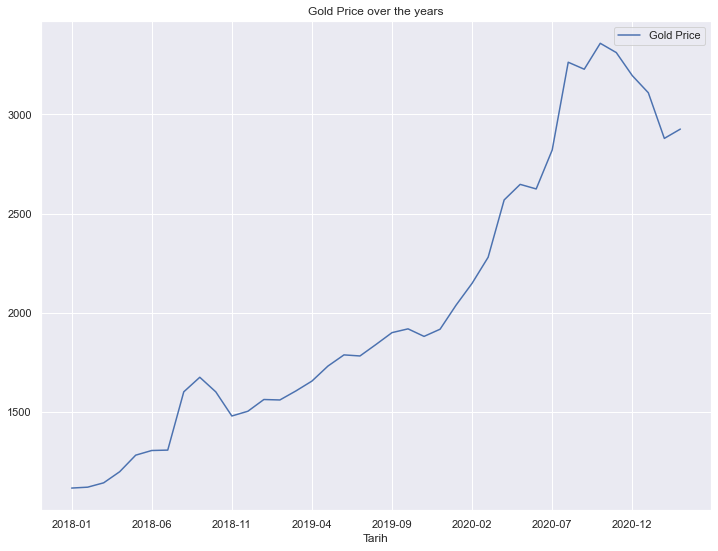

In [11]:
sns.set(rc={'figure.figsize':(12,9)})
altın.plot()
plt.title("Gold Price over the years")
plt.show()

- Observing the data, gold clearly has a increasing trend between the years 2018 and 2021. These overall trend may be caused that the people tend to allocate money on the saving in the times of crisis and gold has been a trusty investing tool for Turkish people for many years. There is no dramatic peaks or down in the line. 

In [12]:
df3 = pd.read_excel("fiyat_endeksi.xlsx")
fiyat = df3.copy()
fiyat.drop("Unnamed: 2" , axis = 'columns' , inplace = True)
fiyat.set_index("Tarih", inplace = True)
fiyat.columns = ['Consumer Price Index']
fiyat.drop(fiyat.tail(6).index,
        inplace = True)

fiyat.head()

,Consumer Price Index
Tarih,
2018-01,330.75
2018-02,333.17
2018-03,336.48
2018-04,342.78
2018-05,348.34


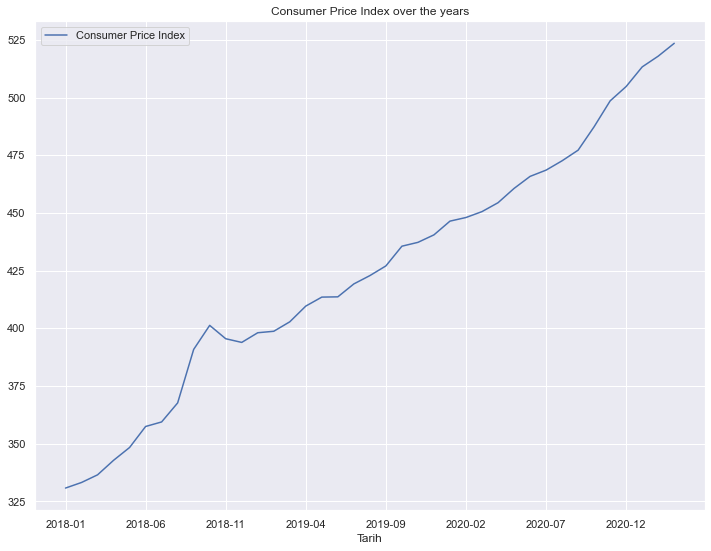

In [13]:
sns.set(rc={'figure.figsize':(12,9)})
fiyat.plot()
plt.title("Consumer Price Index over the years")
plt.show()

- By looking data above, we again see a perfectly increasing trend over the years. These trend mostly due to the fact that these fixed baskets consist of a lot of imported goods which their price is indexed on USD and Turkey imports a lot of goods in  those baskets.  

### Comments
- Both gold prices and consumer price index is correlated with the USD exchange rate, as the USD exchange rate increases, they increases too. Maybe inflation would give a similar output instead of consumer price index. However, overall looking these time series seem to have similar trends and the reason for this seems to be the increasing trend of USD. 
- The relation between the gold price and USD might be explained as below article provided by SPK.  
https://www.spk.gov.tr/SiteApps/Yayin/YayinGoster/1016

## Part B 
- In this part, I try to find things that might be correlated with the things I investigated above. The data I used is provided by Google Trends(Turkish)
- For the USD data, I looked up the word "Döviz Hesabı" to find out whether people tend to open foreign currency bank accounts while dollar has an increasing trend. 
- For the Gold Prices data, I looked up quarter gold coin prices to find out whether people are more likely to choose quarter gold coins since full gold coins are hard to afford due to increasing prices. 
- For the CPI data, I looked up the word "A101 Katalog" to find out whether people are inclined to look for cheaper products as CPI increases. 
- The manipulations I did for the Google Trends data were basically reading the csv file, deleting unnecessary columns and rows, setting the date column to index and lastly converting the string values to integer values since search volumes are recorded as string. 

In [14]:
df = pd.read_csv("dolar_trends.csv")
dolar = pd.DataFrame(df["Kategori: Tüm kategoriler"].values, index = df.index)
values = pd.DataFrame(dolar[1::].values, index = df.index[1::])
values.columns = ["Search_Volume"]
values.index.name = "Tarih"
values['Search_Volume'] = values['Search_Volume'].astype(int)
values.head(5)

,Search_Volume
Tarih,
2018-01-07,10
2018-01-14,17
2018-01-21,12
2018-01-28,13
2018-02-04,5


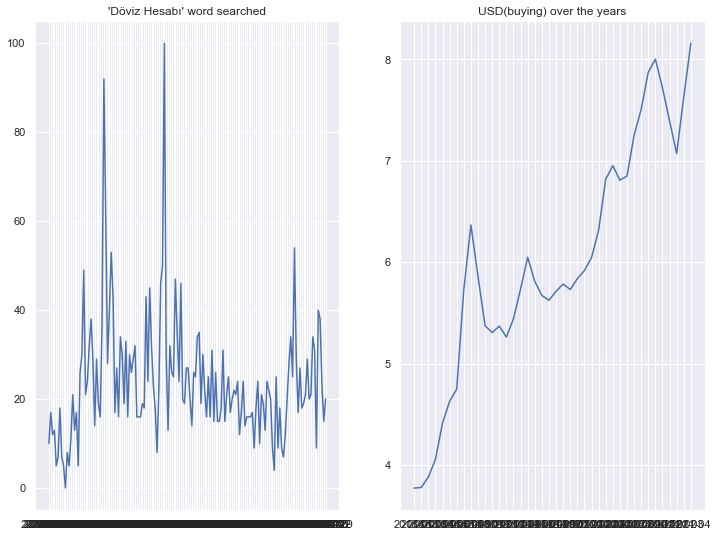

In [21]:
plt.subplot(1, 2, 1)
plt.plot(values.index, values.Search_Volume)
plt.title("'Döviz Hesabı' word searched");
plt.subplot(1, 2, 2)
plt.plot(usd.index, usd.values)
plt.title("USD(buying) over the years");

- As we can see from the charts, in the same time interval, the word "Döviz Hesabı" has not an increasing trend but the peak points is similar when the USD exchange rate increased. Thus, we can say that people tend to open foreign currency bank account when USD buying prices have a dramatic increase probably due to investment oppurtunities. 

In [20]:
df = pd.read_csv("gram_trends.csv")
splitted = pd.DataFrame(df["Kategori: Tüm kategoriler"].values, index = df.index)
gram = pd.DataFrame(splitted[1::].values, index = df.index[1::])
gram.columns = ["Search_Volume"]
gram.index.name = "Tarih"
gram['Search_Volume'] = gram['Search_Volume'].astype(int)
gram.head(5)

,Search_Volume
Tarih,
2018-01-07,5
2018-01-14,6
2018-01-21,6
2018-01-28,5
2018-02-04,6


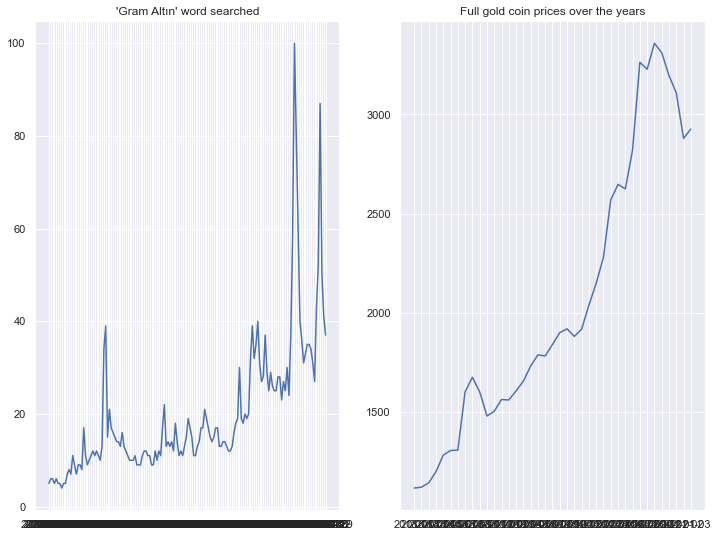

In [22]:
plt.subplot(1, 2, 1)
plt.plot(gram.index, gram.Search_Volume)
plt.title("'Gram Altın' word searched");
plt.subplot(1, 2, 2)
plt.plot(altın.index, altın.values)
plt.title("Full gold coin prices over the years");

- Since the full gold prices are increasing over time, it is clearly seen that people tend to choose quarter gold coins more over the same time interval.  

In [27]:
df = pd.read_csv("a101_katalog.csv")
splitted = pd.DataFrame(df["Kategori: Tüm kategoriler"].values, index = df.index)
market = pd.DataFrame(splitted[1::].values, index = df.index[1::])
market.columns = ["Search_Volume"]
market.index.name = "Tarih"
market['Search_Volume'] = market['Search_Volume'].astype(int)
market.head(5)

,Search_Volume
Tarih,
2018-01-07,25
2018-01-14,26
2018-01-21,32
2018-01-28,33
2018-02-04,27


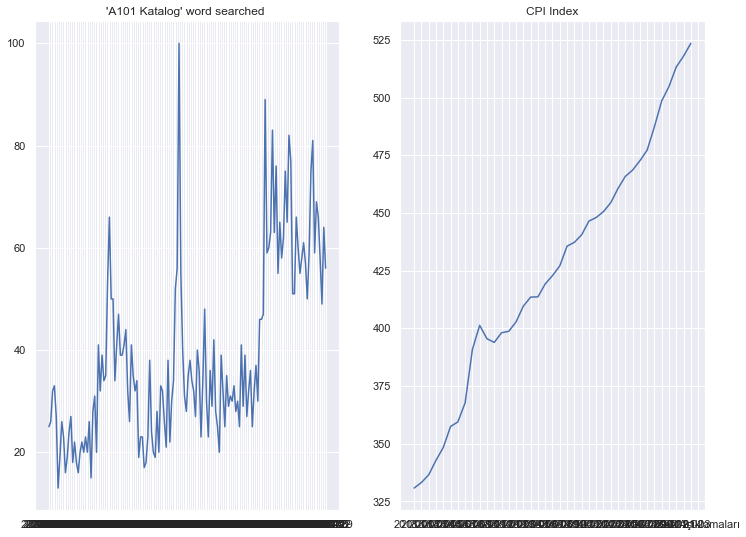

In [28]:
plt.subplot(1, 2, 1)
plt.plot(market.index, market.Search_Volume)
plt.title("'A101 Katalog' word searched ");
plt.subplot(1, 2, 2)
plt.plot(fiyat.index, fiyat.values)
plt.title("CPI Index");

- A101 is one of the cheapest supermarket companies in the Turkey. They basically do not care the indoor design of the market and the branding of the products so to offer lower prices. By looking at the table, we see that as CPI increases, people are inclined to look for cheaper products in the market. The graph on the left shows the catalogue search of "A101" where they show the products that they offer discounts and both CPI and search volume increases due to increasing inflation. 